# Applying the Model

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
img_md_subset = pd.read_csv('../../../Data/ifcb_ecotaxa_subset_update.csv')
img_md_subset = img_md_subset.drop('Unnamed: 0', 1)

In [4]:
img_md_subset = pd.read_csv('../../../Data/ecotaxa_export_3203_20200909_1843.tsv', sep='\t')

In [3]:
img_md_subset.head()

,object_id,object_annotation_status,object_annotation_category,object_annotation_hierarchy,sample_flag,object_lat,object_lon,object_date,object_time,object_pmt_fluorescence,object_peak_fluorescence
0,D20180221T193119_IFCB116_01153,validated,Pyramimonas,living>Eukaryota>Archaeplastida>Viridiplantae>...,good,-64.7535,-64.1339,20180221,193119,0.26577,1.71370
1,D20180221T202431_IFCB116_00153,validated,Gymnodinium,living>Eukaryota>Harosa>Alveolata>Myzozoa>Holo...,good,-64.7741,-64.1655,20180221,202431,0.00269,0.01279
2,D20180221T202431_IFCB116_01303,validated,Gymnodinium,living>Eukaryota>Harosa>Alveolata>Myzozoa>Holo...,good,-64.7741,-64.1655,20180221,202431,0.17801,1.47800
3,D20180221T202431_IFCB116_03008,validated,Katodinium,living>Eukaryota>Harosa>Alveolata>Myzozoa>Holo...,good,-64.7741,-64.1655,20180221,202431,0.00254,0.01276
4,D20180221T212254_IFCB116_07034,validated,Pyramimonas,living>Eukaryota>Archaeplastida>Viridiplantae>...,good,-64.7802,-63.9785,20180221,212254,0.02183,0.35693


In [4]:
len(img_md_subset)

1977145

In [37]:
dtps = []
for dt in img_md_subset.dtypes:
    if dt == 'float64':
        dtps.append('f')
    elif dt == 'object':
        dtps.append('t')

In [39]:
for i in dtps:
    print(i)

t
f
f
t
f
f
t
t
t
f
f
t
t
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
t
f
t
t
t
t
t
t
f
f
f
f
t
t
t
t
t
t
t
t
t
t
t
f


In [7]:
# For now only using validated images
#img_md_subset = img_md_subset[img_md_subset.object_annotation_status == 'validated']

rare_count = 125

unique_validated = img_md_subset[img_md_subset.object_annotation_status == 'validated'].groupby('object_annotation_category')['object_id'].nunique()

rare_classes = unique_validated[unique_validated <= rare_count]

#val_img_subset = val_img_subset[val_img_subset['object_annotation_category'].isin(list(rare_classes.index))]
rare_classes

object_annotation_category
Asteromphalus                  5
Banquisia belgicae            43
Cocconeis                     13
Crustacea                      7
Dinophysis                    29
Diplopsalis<Dinophyceae X     12
Eucampia                     102
Eucampia chain                62
Gyrodinium                    85
Licmophora                    78
Membraneis chain               8
Odontella sp.                 37
Pleurosigma                    1
Rhizosolenia                  82
Tintinnida                    43
Torodinium                   110
Warnowia                      31
centric 10 temp                5
centric 4 temp                46
chain<centric                 31
t004                          12
t006                          48
t009                          70
t016                          75
t017                          26
t020                           4
Name: object_id, dtype: int64

In [8]:
img_md_subset.columns

Index(['object_id', 'object_annotation_status', 'object_annotation_category',
       'object_annotation_hierarchy', 'sample_flag', 'object_lat',
       'object_lon', 'object_date', 'object_time', 'object_pmt_fluorescence',
       'object_peak_fluorescence'],
      dtype='object')

In [9]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

In [10]:
import glob, os

file_dir = '../../../Data/140920_export/'

os.chdir(file_dir)
fn_list = []
for file in glob.glob("*.png"):
    fn_list.append(file)
    
print(len(fn_list))

fn_edit = [x[:-4] for x in fn_list]

available_subset = img_md_subset[img_md_subset['object_id'].isin(fn_edit)]
len(available_subset)

1976952


1977145

In [11]:
class_id_dict = {'Amphiprora': 0,
 'Bacillariophyceae': 1,
 'Banquisia belgicae': 2,
 'Ceratium': 3,
 'Chaetoceros single': 4,
 'Chaetoceros<Mediophyceae': 5,
 'Ciliophora': 6,
 'Corethron': 7,
 'Cryptophyta': 8,
 'Cylindrotheca': 9,
 'Dactyliosolen': 10,
 'Dictyochales': 11,
 'Dinophyceae': 12,
 'Dinophysis': 13,
 'Eucampia': 14,
 'Eucampia chain': 15,
 'Guinardia': 16,
 'Gymnodinium': 17,
 'Gyrodinium': 18,
 'Katodinium': 19,
 'Licmophora': 20,
 'Membraneis': 21,
 'Navicula': 22,
 'Nitzschia frigida': 23,
 'Odontella sp.': 24,
 'Phaeocystis': 25,
 'Proboscia sp.': 26,
 'Pseudo-Nitzschia chain': 27,
 'Pyramimonas': 28,
 'Rhizosolenia': 29,
 'Thalassiosira': 30,
 'Tintinnida': 31,
 'Torodinium': 32,
 'Warnowia': 33,
 'badfocus<artefact': 34,
 'bead': 35,
 'bubble': 36,
 'centric': 37,
 'centric 1 temp': 38,
 'centric 2 temp': 39,
 'centric 3 temp': 40,
 'centric 4 temp': 41,
 'centric 6 temp': 42,
 'chain<centric': 43,
 'chain<pennate': 44,
 'detritus': 45,
 'dinoflagellate-i': 46,
 'dinoflagellate-ii': 47,
 'dinoflagellate-iii': 48,
 'multiple<other': 49,
 'part<other': 50,
 'pennate 10 temp': 51,
 'pennate 11 temp': 52,
 'pennate 2 temp': 53,
 'pennate 7 temp': 54,
 'pennate<Bacillariophyta': 55,
 't002': 56,
 't003': 57,
 't005': 58,
 't006': 59,
 't007': 60,
 't008': 61,
 't009': 62,
 't010': 63,
 't011': 64,
 't012': 65,
 't013': 66,
 't016': 67,
 't017': 68,
 't019': 69,
 'temp cylindrotheca': 70}

id_class_dict = dict((v,k) for k,v in class_id_dict.items())

In [12]:
len(class_id_dict)

71

In [53]:
frac = 0.05
int(len(available_subset) * frac)

98857

In [116]:
#prediction_subset = available_subset.sample(frac=frac)
prediction_subset = available_subset[:500000]

In [117]:
prediction_subset.head()

,object_id,object_annotation_status,object_annotation_category,object_annotation_hierarchy,sample_flag,object_lat,object_lon,object_date,object_time,object_pmt_fluorescence,object_peak_fluorescence
0,D20180221T193119_IFCB116_01153,Predicted,Pyramimonas,living>Eukaryota>Archaeplastida>Viridiplantae>...,good,-64.7535,-64.1339,20180221,193119,0.26577,1.71370
1,D20180221T202431_IFCB116_00153,Predicted,Gymnodinium,living>Eukaryota>Harosa>Alveolata>Myzozoa>Holo...,good,-64.7741,-64.1655,20180221,202431,0.00269,0.01279
2,D20180221T202431_IFCB116_01303,Predicted,Gymnodinium,living>Eukaryota>Harosa>Alveolata>Myzozoa>Holo...,good,-64.7741,-64.1655,20180221,202431,0.17801,1.47800
3,D20180221T202431_IFCB116_03008,Predicted,Katodinium,living>Eukaryota>Harosa>Alveolata>Myzozoa>Holo...,good,-64.7741,-64.1655,20180221,202431,0.00254,0.01276
4,D20180221T212254_IFCB116_07034,Predicted,t012,living>Eukaryota>Archaeplastida>Viridiplantae>...,good,-64.7802,-63.9785,20180221,212254,0.02183,0.35693


In [118]:
len(prediction_subset)

500000

In [18]:
from tensorflow import keras

model = keras.models.load_model('../model_weights_all_classes_flu.hdf5')

In [120]:
def generate_data(available_subset, batch_size):
    """Replaces Keras' native ImageDataGenerator."""
    i = 0
    while True:
        images = []
        labels = []
        merged_labels = []
        original_labels = []
        flu_data = []
        
        for b in range(batch_size):
            if i >= len(available_subset):
                i=0
            row = available_subset.iloc[i]
            i+=1
            
            img = image.load_img(row['object_id']+'.png', target_size=(150, 150), color_mode="grayscale")
            images.append(image.img_to_array(img))
            #labels.append(class_id_dict[row['merged_category']])
            #merged_labels.append(row['merged_category'])
            original_labels.append(row['object_annotation_category'])
            flu_data.append([row['object_pmt_fluorescence'], row['object_peak_fluorescence']])
        
        image_batch = np.array(images) / 130
        flu_batch = np.array(flu_data)
        
        
        yield [image_batch, flu_batch]

In [121]:
500000 / 1000

500.0

In [ ]:
predict_prob = model.predict_generator(generator = generate_data(prediction_subset,batch_size=1000), steps=500, verbose=1)
#predict_prob = model.predict([X_predict, flu_data])

333/500 [==================>...........] - ETA: 2:15

In [ ]:
predict_prob.shape

In [ ]:
predictions = np.argmax(predict_prob, axis=1)

In [ ]:
predict_prob_values = []
for i in range(len(predictions)):
    predict_prob_values.append(predict_prob[i][predictions[i]])

In [ ]:
np.mean(predict_prob_values), np.std(predict_prob_values)

In [ ]:
prediction_subset['image_file_name'] = prediction_subset['object_id'] + '.png'

In [ ]:
prediction_subset['object_annotation_category'] = [id_class_dict[x] for x in predictions]

In [ ]:
prediction_subset['object_score'] = predict_prob_values

In [ ]:
prediction_subset['object_annotation_status'] = 'Predicted'

In [ ]:
prediction_subset = prediction_subset[['object_id','object_annotation_status','object_annotation_category','sample_flag','object_lat','object_lon','image_file_name','object_score']]

In [ ]:
#prediction_subset.to_csv('../ecotaxa_cnn_predictions_290920.csv', sep='\t')

In [ ]:
prediction_subset.head()

In [ ]:
classes, counts = np.unique(predictions, return_counts=True)
classes, counts

In [ ]:
# go through the final predictions and find images where there are less than 150 validated and only include those in the final

# then only get ~300 of those maximum

In [ ]:
rare_classes.index

In [ ]:
rare_prediction_subset = prediction_subset[prediction_subset['object_annotation_category'].isin(list(rare_classes.index))]

In [ ]:
rare_prediction_subset.head()

In [ ]:
prediction_counts = rare_prediction_subset.groupby('object_annotation_category')['object_id'].nunique()
prediction_counts

In [ ]:
buckets = {}
for key in id_class_dict:
    buckets[key] = 0

object_ids = []

max_count = 300

for index, row in rare_prediction_subset.iterrows():
    if buckets[class_id_dict[row['object_annotation_category']]] < max_count:
        object_ids.append(row['object_id'])
        buckets[class_id_dict[row['object_annotation_category']]] += 1
len(object_ids)

rare_cut_df = rare_prediction_subset[rare_prediction_subset['object_id'].isin(object_ids)]
rare_cut_df.head()

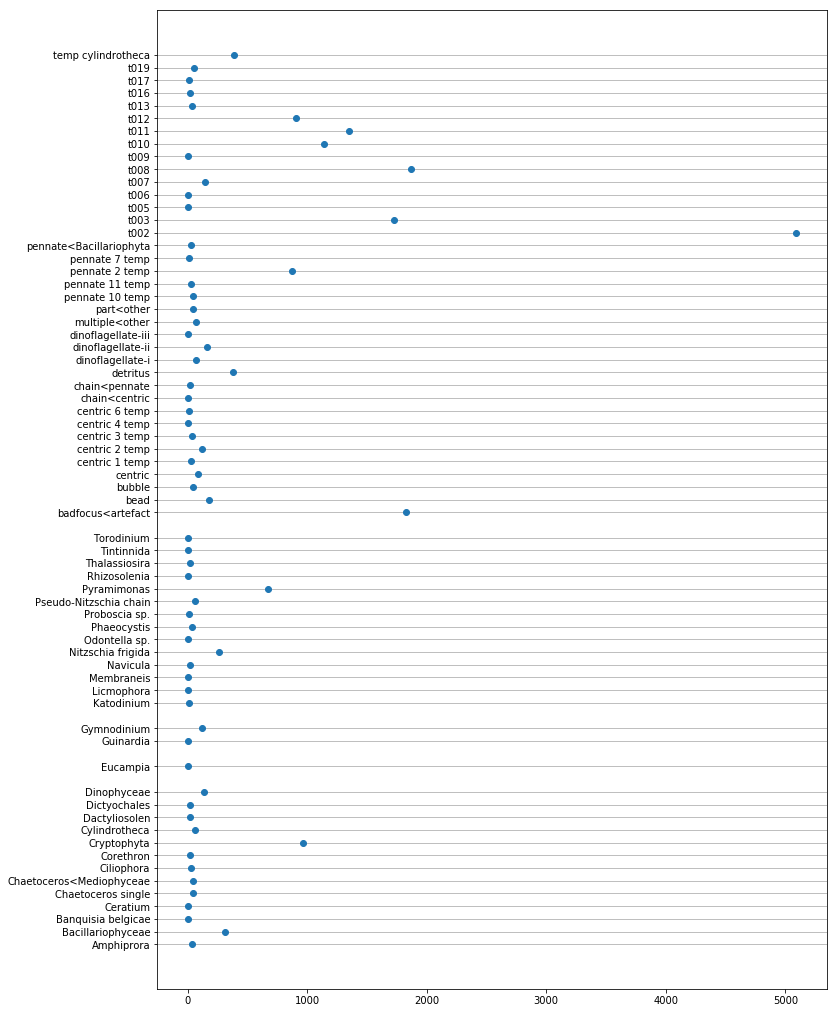

In [45]:
fig, ax = plt.subplots(figsize=(12, 18))
ax.scatter(counts, classes)
ax.set_yticks(classes)
ax.set_yticklabels([id_class_dict[x] for x in classes])
#ax.set_xlim(-10,500)
#ax.set_xscale('log')

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

# Turn on the minor TICKS, which are required for the minor GRID
#ax.minorticks_on()

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='grey', axis='y')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
#plt.savefig('output_predictions.png', dpi=300)
plt.show()

In [50]:
min_count = 20
unique_validated = available_subset.groupby('object_annotation_category')['object_id'].nunique()

sufficient_classes = unique_validated[unique_validated >= min_count]

In [51]:
len(sufficient_classes)

74

In [46]:
#classes, counts = np.unique(labels, return_counts=True)
classes, counts

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 33, 34, 35, 36,
        37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
        55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70]),
 array([  26,  296,    1,    6,   58,   83,   39,   18,  935,   51,   14,
          28,  143,    1,    2,    1,    4,  169,   16,    9,    6,   21,
         492,    1,   15,    6,   65,  362,    5,   37,    1, 1671,  563,
          62,   85,   48,  142,   34,    3,   10,   19,  469,  140,  141,
           2,   44,   94,   52,   33,  877,   12,   16, 5581, 1519,    9,
           6,  244, 1566,    2, 1348,  874,  857,   22,   36,   25,   50,
         204]))

In [47]:
sufficient_classes

object_annotation_category
Amphiprora                     5339
Bacillariophyceae             28443
Banquisia belgicae               46
Ceratium                        224
Chaetoceros single             4805
Chaetoceros<Mediophyceae       1438
Ciliophora                     7245
Corethron                       919
Cryptophyta                   70779
Cylindrotheca                  3572
Dactyliosolen                   708
Dictyochales                  12322
Dinophyceae                   12792
Dinophysis                       48
Diplopsalis<Dinophyceae X        22
Eucampia                        279
Eucampia chain                   74
Guinardia                       518
Gymnodinium                   14367
Gyrodinium                      174
Katodinium                      838
Licmophora                      104
Membraneis                      322
Navicula                       1484
Nitzschia frigida             20343
Odontella sp.                    37
Phaeocystis                    2792
P

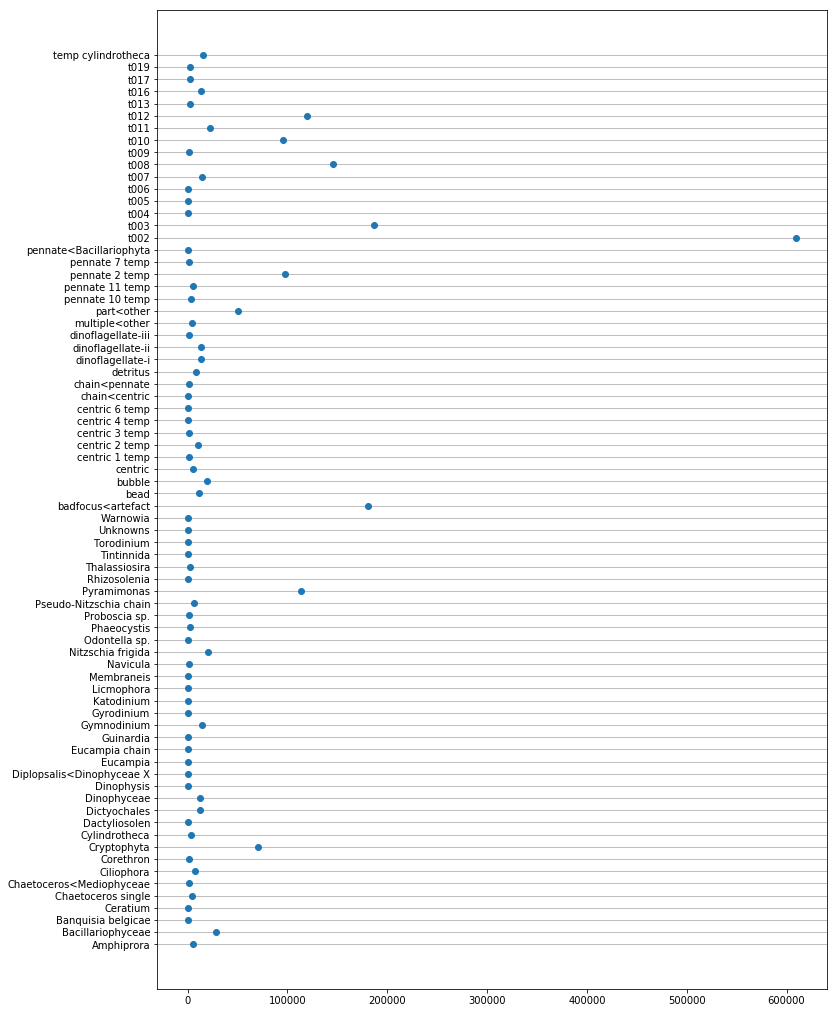

In [48]:
fig, ax = plt.subplots(figsize=(12, 18))
ax.scatter(sufficient_classes.values, range(0,len(sufficient_classes)))
ax.set_yticks(range(0,len(sufficient_classes)))
ax.set_yticklabels(list(sufficient_classes.index))
#ax.set_xlim(-10,500)
#ax.set_xscale('log')

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

# Turn on the minor TICKS, which are required for the minor GRID
#ax.minorticks_on()

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='grey', axis='y')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

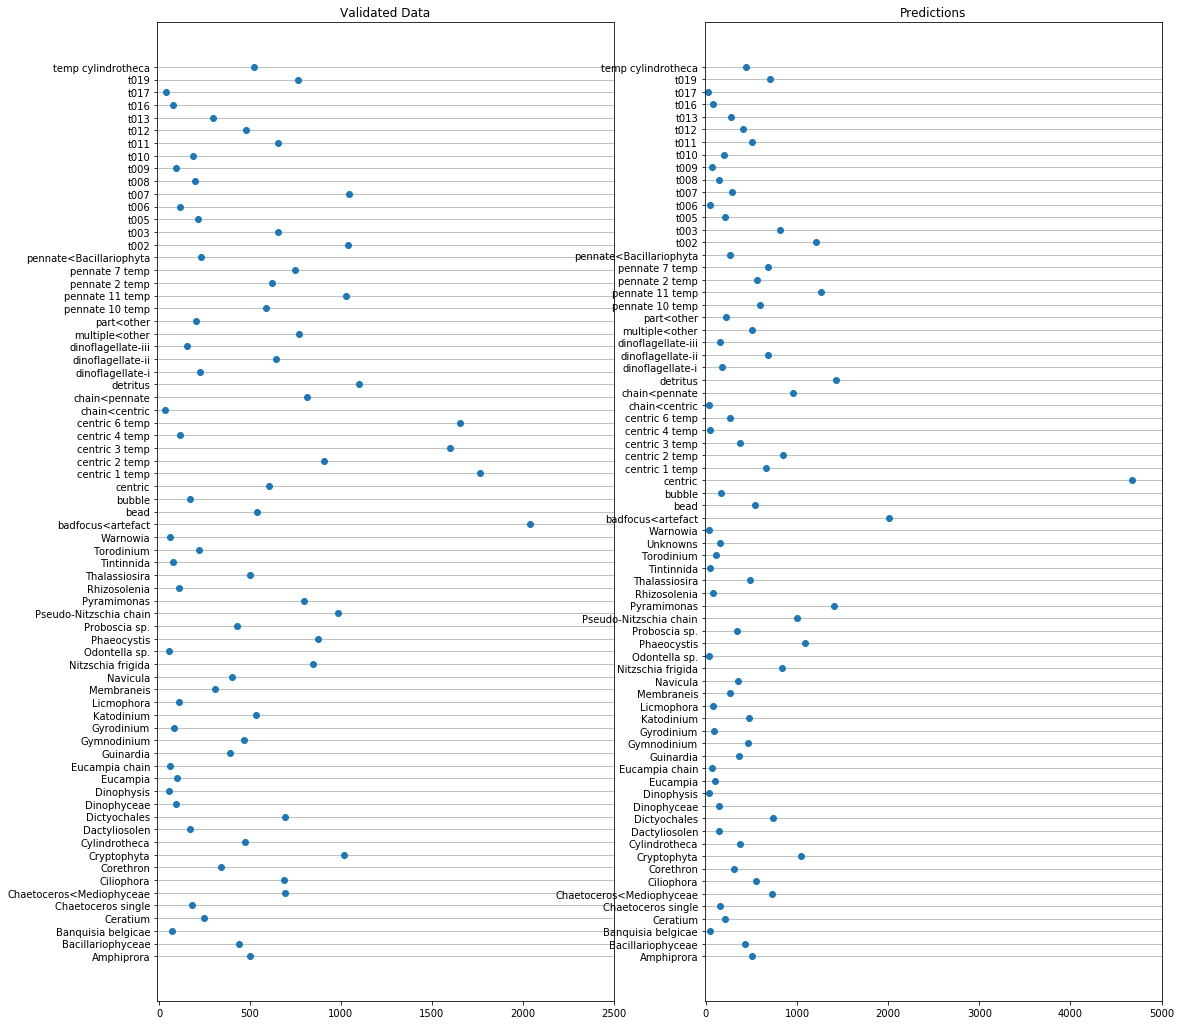

In [39]:
fig, ax = plt.subplots(1,2, figsize=(18, 18))
ax[1].scatter(sufficient_classes.values, range(0,len(sufficient_classes)))
ax[1].set_yticks(range(0,len(sufficient_classes)))
ax[1].set_yticklabels(list(sufficient_classes.index))
#ax.set_xlim(-10,500)
#ax.set_xscale('log')

# Don't allow the axis to be on top of your data
ax[1].set_axisbelow(True)
ax[1].set_xlim(-10,5000)
ax[1].set_title("Predictions")


# Turn on the minor TICKS, which are required for the minor GRID
#ax.minorticks_on()

# Customize the major grid
ax[1].grid(which='major', linestyle='-', linewidth='0.5', color='grey', axis='y')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

ax[0].scatter(counts, classes)
ax[0].set_yticks(range(0,len(class_id_dict)))
ax[0].set_yticklabels([id_class_dict[x] for x in classes])
ax[0].set_xlim(-10,2500)
#ax.set_xscale('log')

# Don't allow the axis to be on top of your data
ax[0].set_axisbelow(True)
ax[0].set_title("Validated Data")

# Turn on the minor TICKS, which are required for the minor GRID
#ax.minorticks_on()

# Customize the major grid
ax[0].grid(which='major', linestyle='-', linewidth='0.5', color='grey', axis='y')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.savefig('output_predictions_comparison_full.png', dpi=300)
plt.show()

In [ ]:
# pull out only validated images and run it on them and see how close the total numbers compare